# Equações diferenciais ordinárias

## Método de Euler–Cromer

Pode-se mostrar que, ao aplicar o método de Euler a um sistema sujeito a forças conservativas, a energia não se conserva. O problema é que o método de Euler sempre faz uma extrapolação linear do novo estado com base apenas no estado atual. Se as derivadas forem muito grandes, esta extrapolação não é uma aproximação muito boa.

Uma pequena modificação no método de Euler é suficiente para que a sua solução seja conservativa:

\begin{align}
v_{j+1} &= v_j + h f_v(x_j, v_j, t_j) \\
x_{j+1}&= x_j + h v_{j+1}.
\end{align}

No termo em $h$ na posição no método de Euler, $v_j$ se torna $v_{j+1}$.  Esta modificação faz com que o método de Euler consiga "ver no futuro", o novo estado depende tanto do estado anterior quanto dele mesmo. Este método modificado é chamado de [método de Euler–Cromer](https://sci-hub.se/10.1119/1.12478) (Abby Aspel?). 

### Exercício 1

**a.** Resolva o oscilador harmônico usando o método de Euler tradicional. Considere $k=1$, $m=1$, e condições iniciais $x=1$ e $v=0$ quando $t=0$. Use um passo $h=0.15$, e resolva até $t=10$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
k = 1
m = 1
x0 = 1
v0 = 0
t0 = 0
tf = 10
h = 0.15

def f(x):
    return (-k/m)*x

N = int((tf-t0)/h)

t = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)

t[0] = t0
v[0] = v0
x[0] = x0

for j in range(N-1):
    t[j+1] = t[0] + h*(j+1)
    v[j+1] = v[j] + f(x[j])*h
    x[j+1] = x[j] + h*v[j]

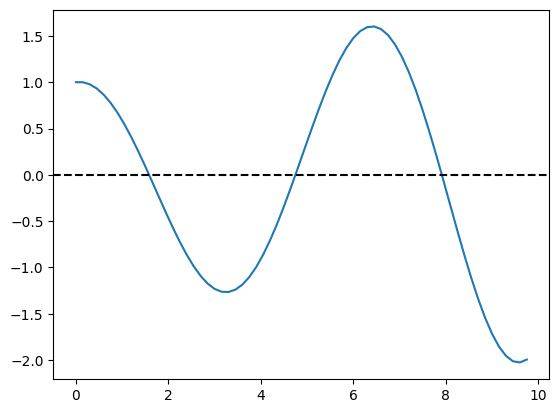

In [29]:
fig, ax = plt.subplots(1,1)

ax.plot(t,x)
ax.axhline(0,0, ls = "--", color = "black")

**b.** Resolva novamente o problema usando o método de Euler–Cromer. Guarde o resultado em um array separado.

In [30]:
v_c0 = 0
x_c0 = 1
t_c0 = 0
t_cf = 10

v_c = np.zeros(N)
x_c = np.zeros(N)
t_c = np.zeros(N)

v_c[0] = v_c0
x_c[0] = x_c0
t_c[0] = t_c0

for j in range(N-1):
    t_c[j+1] = t_c[0] + h*(j+1)
    v_c[j+1] = v_c[j] + f(x_c[j])*h
    x_c[j+1] = x_c[j] + h*v_c[j+1]


**c.** Faça o gráfico das duas soluções, junto com a solução analítica.

In [31]:
x_ana = np.zeros(N)
omega = np.sqrt(k/m)
for i in range(N):
    x_ana[i] = x[0]*np.cos(omega*t[i])

In [32]:
v_ana = np.zeros(N)
for i in range(N):
    v_ana[i] = -omega*x[0]*np.sin(omega*t[i])

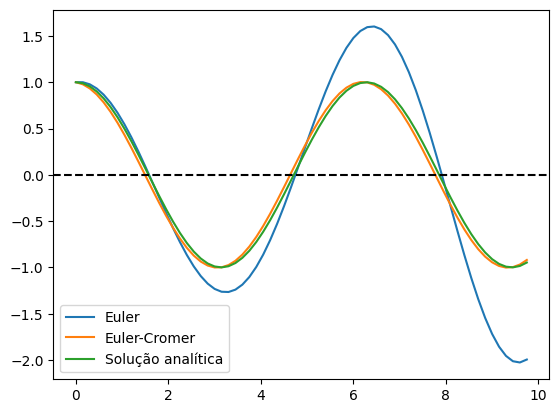

In [33]:
fig, ax = plt.subplots(1,1)

ax.plot(t,x, label = "Euler")
ax.plot(t,x_c, label = "Euler-Cromer")
ax.plot(t,x_ana, label = "Solução analítica")
ax.axhline(0,0, ls = "--", color = "black")
ax.legend()

A solução com o método de Euler–Cromer é muito melhor, mas ainda não é perfeita. Diminuindo o intervalo $h$, você pode melhorar a solução. Mas, como conferir se a energia se conserva?

**d.** Faça o gráfico do *espaço de fase* da solução, isto é, um gráfico da velocidade em função da posição. Novamente, desenhe a curva para as duas soluções e para a solução analítica.

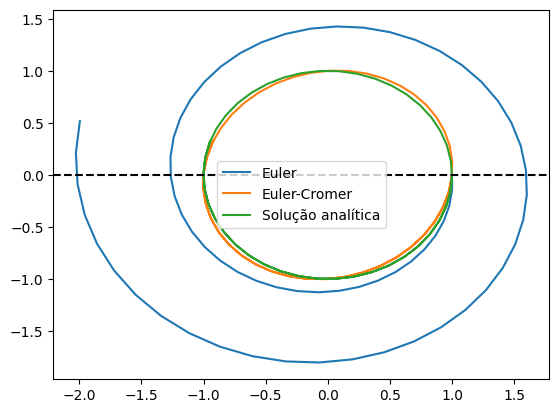

In [34]:
fig, ax = plt.subplots(1,1)

ax.plot(x,v, label = "Euler")
ax.plot(x_c,v_c, label = "Euler-Cromer")
ax.plot(x_ana,v_ana, label = "Solução analítica")
ax.axhline(0,0, ls = "--", color = "black")
ax.legend()

Se o programa funcionou corretamente, a solução com o método de Euler tem amplitudes e velocidades cada vez maiores. Já o método de Euler–Cromer nos dá uma solução que fica confinada à vizinhança da solução real do problema. Métodos que conservam a energiam como o de Euler–Cromer, são chamados de *métodos simpléticos*.

### Exercício 2

A oscilação de um pêndulo é aproximadamente igual a um oscilador harmônico simples para ângulos pequenos. Vamos ver o que acontece quando não fazemos esta aproximação.

Suponha que o pêndulo tenha uma haste rígida de comprimento $L = 1\,\mathrm{m}$, e uma massa $m = 1\,\mathrm{kg}$ presa à extremidade livre. Neste caso o movimento é descrito pela dinâmica de corpos rígidos, dada pelas equações

\begin{cases}
&I \dfrac{\mathrm{d}\omega}{\mathrm{d}t} = \tau \\
&\dfrac{\mathrm{d}\theta}{\mathrm{d}t} = \omega,
\end{cases}

onde $\tau$ é o torque, $I$ é o momento de inércia, $\omega$ é a velocidade angular, e $\theta$ é o ângulo que o pêndulo faz com a vertical. No nosso caso, $I = mL^2$, e o torque é causado pela força da gravidade, $\tau = -mgL \sin \theta$. Assim,

\begin{align}
    mL^2 \frac{\mathrm{d}\omega}{\mathrm{d}t} &= -mgL \sin \theta \\
    \frac{\mathrm{d}\omega}{\mathrm{d}t} &= -\frac{mgL}{mL^2} \sin \theta
\end{align}

\begin{cases}
    &\dfrac{\mathrm{d}\omega}{\mathrm{d}t} = -\dfrac{g}{L} \sin \theta \\
    &\dfrac{\mathrm{d}\theta}{\mathrm{d}t} = \omega.
\end{cases}

Este sistema de EDOs acopladas tem solução analítica em termos de funções elípticas de Jacobi, veja [Beléndez *et al* (2007)](http://www.sbfisica.org.br/rbef/pdf/070707.pdf). Porém, podemos resolver facilmente este sistema com o que já aprendemos até aqui.

Calcule a solução numérica da oscilação do pêndulo para uma posição inicial $A = 10^\circ, 45^\circ, 90^\circ$ e $179^\circ$ (lembre que devemos fazer os cálculos em radianos), partindo do repouso ($\omega = 0$), para um intervalo de tempo de 10 segundos.

Na mesma figura, desenhe também o gráfico da solução analítica aproximada para ângulos pequenos ($\sin \theta \approx \theta$), e compare com os seus resultados.

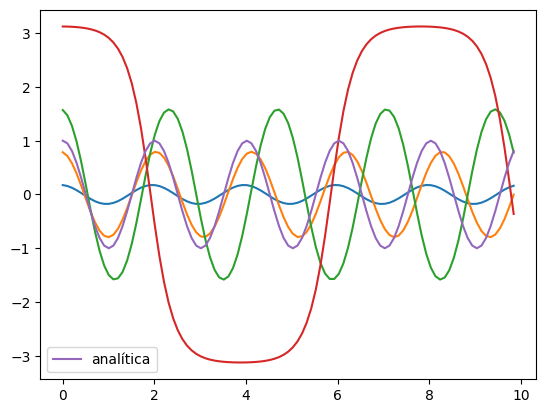

In [49]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
m = 1
g = 9.7915

def fw(theta):
    return (-g/L)*np.sin(theta)

A = np.array([10, 45, 90, 179])

w0 = 0
t0 = 0
tf = 10
h = (2 * np.pi * np.sqrt(L/g))/20
N = int((tf - t0) / h)

the = np.zeros(N)
w = np.zeros(N)
tt = np.zeros(N)

w[0] = w0
tt[0] = t0

fig, ax = plt.subplots(1, 1)

for i in range(len(A)):
    the[0] = np.deg2rad(A[i])

    for j in range(N-1):
        tt[j+1] = tt[0] + h * (j+1)
        w[j+1] = w[j] + h * fw(the[j])
        the[j+1] = the[j] + h * w[j+1]

    ax.plot(tt, the)
    
ax.plot(tt,np.cos(np.sqrt(g/L) * tt), label = "analítica")
ax.legend()
plt.show()


### Exercício 3

A trajetória de um corpo em queda livre é facilmente calculada analiticamente na ausência de arrasto do ar. Levando em conta o arraste, por outro lado, deixa as equações de movimento intratáveis, e precisamos resolver o problema numericamente.

Considere uma esfera lisa de massa $0{,}5\,\text{kg}$, com um raio de $5\,\text{cm}$, solta do repouso a uma altura de $1\,\text{km}$. Além da força gravitacional, a esfera está sujeita a uma força de arraste $D$ que se opõe ao movimento, tal que

\begin{align}
F = \left\{ \
\begin{array}{ll}
-m g - D(v) \qquad &\text{se}\ v > 0, \\
-m g + D(v) \qquad &\text{se}\ v < 0,
\end{array}
\right .
\end{align}

com velocidades positivas para cima. O arraste pode ser expresso através de

\begin{align}
D(v) = \frac{1}{2} \rho v^2 C_\text{D} A,
\end{align}

onde $\rho$ é a densidade do ar ($1{,}225\,\text{kg}\,\text{m}^{-3}$), $A$ é a área projetada da esfera, e $C_\text{D}$ é o coeficiente de arraste, que para uma esfera lisa vale $0{,}47$.

As equações do movimento são dadas pelas dinâmica newtoniana:

\begin{align}
\frac{\text{d}v}{\text{d}t} &= \left\{ \
\begin{array}{ll}
-g - \frac{D(v)}{m} \qquad &\text{se}\ v > 0, \\
-g + \frac{D(v)}{m} \qquad &\text{se}\ v < 0,
\end{array}
\right . \\
\frac{\text{d}y}{\text{d}t} &= v.
\end{align}

**a.** Calcule numericamente a solução até $25\,\text{s}$ depois do lançamento.

In [2]:
m = 0.5
r = 5e-2
rho = 1.225
Cd = 0.47
A = np.pi*r**2
t0 = 0
tf = 25
v0 = 0
y0 = 1000
h = 0.1
g = 9.8

def fv(v):
    if v > 0:
        return -g - (0.5*rho*(v**2)*Cd*A)/m
    else:
        return -g + (0.5*rho*(v**2)*Cd*A)/m

N = int((tf-t0)/h)

v = np.zeros(N)
t = np.zeros(N)
y = np.zeros(N)

y[0] =y0
v[0] = v0
t[0] = t0

for j in range(N-1):
    t[j+1] = t[0] + h*(j+1)
    v[j+1] = v[j] + h *fv(v[j])
    y[j+1] = y[j] + h * v[j+1]

**b.** Faça dois gráficos.

* No primeiro, desenhe a altura calculada em função do tempo, e coloque no mesmo gráfico a solução analítica no caso sem arraste. Limite o gráfico a altitudes positivas usando `ax.set_ylim(min, max)`.
* No segundo, desenhe a velocidade calculada em função do tempo, e desenhe também uma linha assintótica horizontal com o valor da *velocidade terminal*. Esta velocidade pode ser facilmente calculada fazendo $F = 0$ (o arraste e a gravidade se equilibram), e isolando $v$.

In [4]:
y_ana = np.zeros(N)
for i in range(N):
    y_ana[i] = v0*t[i] - g*0.5*t[i]**2

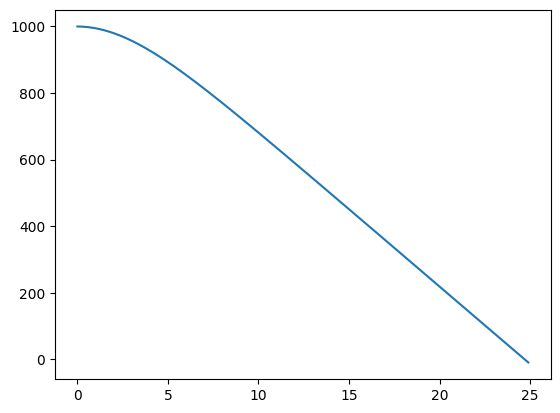

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(t,y)